In [67]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
connection = sqlite3.connect('chinook.db')
cursor = connection.cursor()


In [69]:
a_query = '''select InvoiceId, sum(Quantity) as total, FirstName
from invoices
inner join invoice_items using(InvoiceId)
inner join customers using(CustomerId)
where InvoiceDate BETWEEN "2009-02-01 00:00:00" and "2009-06-23 00:00:00"
group by InvoiceId;'''
cursor = connection.cursor()
cursor.execute(a_query)
connection.commit()
df = pd.read_sql(a_query, connection)
df.head()
cursor.close()
connection.close()

In [72]:
df

,InvoiceId,total,FirstName
0,7,2,Niklas
1,8,2,Dominique
2,9,4,Wyatt
3,10,6,Hugh
4,11,9,Emma
5,12,14,Leonie
6,13,1,Frank
7,14,2,Jack
8,15,2,Tim
9,16,4,Kathy


In [75]:
df['total'].describe()

count    35.000000
mean      5.428571
std       4.401108
min       1.000000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.000000
Name: total, dtype: float64

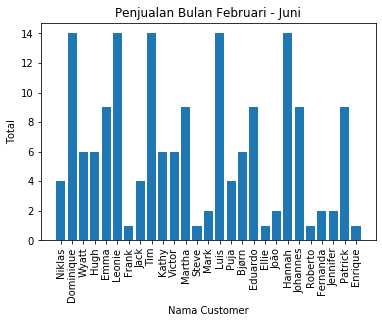

In [71]:
x = df['FirstName']
y = df['total']
plt.bar(x,y)
# Displaying the bar plot
plt.title("Penjualan Bulan Februari - Juni")
plt.xlabel('Nama Customer')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()